In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [22]:
fp = '/Users/Minesh/Desktop/HouseData.csv'
df = pd.read_csv(fp) 

<h2>Question 1</h2>

In [8]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<h2>Question 2</h2>

In [10]:
df.drop(columns=['id'], axis=1, inplace=True)

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<h2>Question 3</h2>

In [13]:
df.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<h2>Question 4</h2>

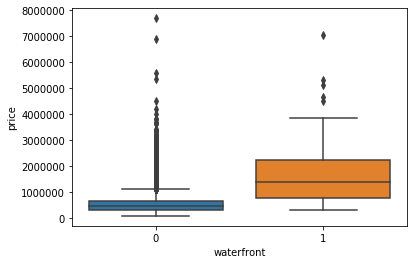

In [16]:
sns.boxplot(x=df['waterfront'], y=df['price']);

<h2>Question 5</h2>

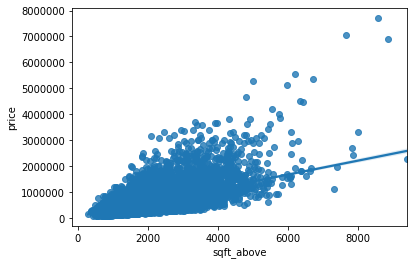

In [18]:
sns.regplot(x=df['sqft_above'], y=df['price']);

<h2>Question 6</h2>

In [25]:
X = df[['sqft_living']]
y = df['price']

linear_model = LinearRegression()
linear_model.fit(X, y)

linear_model.score(X, y)

0.49285321790379316

<h2>Question 7</h2>

In [34]:
X = X = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", \
        "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]
y = df['price']

# Removing 2 NaN values in 'sqft_above' column
remove = X.loc[X.sqft_above.isnull()]
X = X.drop(remove.index, axis=0, inplace=False)
y = y.drop(remove.index, axis=0, inplace=False)

linear_model = LinearRegression()
linear_model.fit(X, y)

linear_model.score(X, y)

0.6577312410909922

<h2>Question 8</h2>

In [36]:
X = X = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", \
        "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]
y = df['price']

# Removing 2 NaN values in 'sqft_above' column
remove = X.loc[X.sqft_above.isnull()]
X = X.drop(remove.index, axis=0, inplace=False)
y = y.drop(remove.index, axis=0, inplace=False)

Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(degree=2)), 
         ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(X, y)

pipe.score(X, y)

0.7506472356171944

<h2>Question 9</h2>

In [42]:
X = X = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", \
        "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]
y = df['price']

# Removing 2 NaN values in 'sqft_above' column
remove = X.loc[X.sqft_above.isnull()]
X = X.drop(remove.index, axis=0, inplace=False)
y = y.drop(remove.index, axis=0, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

ridge_model.score(X_test, y_test)

0.6719729841240742

<h2>Question 10</h2>

In [48]:
X = df[["floors", "waterfront", "lat", "bedrooms", "sqft_basement", \
        "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]]
y = df['price']

# Removing 2 NaN values in 'sqft_above' column
remove = X.loc[X.sqft_above.isnull()]
X = X.drop(remove.index, axis=0, inplace=False)
y = y.drop(remove.index, axis=0, inplace=False)


# Removing 2 NaN values in 'sqft_above' column
remove = X.loc[X.sqft_above.isnull()]
X = X.drop(remove.index, axis=0, inplace=False)
y = y.drop(remove.index, axis=0, inplace=False)

# second order degree polynomialisation on TRAINING + TESTING data (X)
pr = PolynomialFeatures(degree=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting / transforming training + testing data
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_pr, y_train)

y_hat = ridge_model.predict(X_test_pr)

score = r2_score(y_hat, y_test)

score



0.6756512495000421